In [132]:
import csv
import pandas as pd
import re
import emoji
import nltk
from ekphrasis.classes.segmenter import Segmenter
import preprocessor as p
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Part of the code is referenced on online source
#https://stackoverflow.com/questions/64719706/cleaning-twitter-data-pandas-python

def return_doge_dict():
    nltk.download('words')
    words = set(nltk.corpus.words.words())

    #column_name = ['Date','Tweet']
    origin = pd.read_csv('Elon_Musk.csv')

    Tweet_tgt = origin.text

    #segmenter using the word statistics from Twitter
    seg_tw = Segmenter(corpus='twitter')

    data = []
    #forming a separate feature for cleaned tweets
    for i,v in enumerate(Tweet_tgt):
        data.append(p.clean(v))

    nltk.download
    nltk.download('wordnet')
    nltk.download('stopwords')
    from nltk.tokenize import TweetTokenizer

    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words

    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer = TweetTokenizer()

    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]


    df = pd.DataFrame(data,columns=["Tweet"])
    stop_words = set(stopwords.words('english'))
    cleaned_data = df.apply(lambda x: [item for item in \
    x if item not in stop_words])

    z = lambda x: re.compile('\#').sub('', re.compile('RT @').sub('@', x, count=1).strip())

    full_data = []
    for i in cleaned_data["Tweet"]:
        result = []
        sentence = z(i.replace("b'RT :", "").replace("b'","").replace('b"RT', ''))
        sentence = sentence.strip()
        cleaned_sentence = sentence.split()
        cleaned_sentence = list(filter(lambda x:x[0:1]!= "\\", sentence.split()))
        
        for j in cleaned_sentence:
            sep = '\\'
            stripped = j.split(sep, 1)[0]
            result.append(stripped)

        full_data.append(result)

    cnt = 0
    doge_dict = {}
    doge = {}
    origin["Date"] = pd.to_datetime(origin.created_at)
    origin["Date"] = origin["Date"].dt.date

    doge_mentioned = []
    doge_mentioned_date = []

    for i in range(len(df)):
        if any("doge" in s.lower() for s in full_data[i]):
            doge_mentioned.append(origin['text'][i])
            doge_mentioned_date.append(origin['Date'][i])
            cnt += 1
            if str(origin['Date'][i]) in doge_dict:
                doge_dict[str(origin['Date'][i])] += 1
            else:
                doge_dict[str(origin['Date'][i])] = 1
            #doge_list.append(df['Tweet'][i])
            #print(origin['created_at'][i], full_data[i])
    print("Elon has mentioned Doge " + str(cnt) + " times in his tweets")
    
    doge = pd.DataFrame()
    doge['Date'] = doge_mentioned_date
    doge['Tweet'] = doge_mentioned
    #doge = pd.DataFrame([doge_mentioned_date,doge_mentioned], columns=['Date','Tweet'])
    return doge_dict, doge

doge_dict, doge_tweets = return_doge_dict()

[nltk_data] Downloading package words to /Users/ZhaoLi/nltk_data...
[nltk_data]   Package words is already up-to-date!


Reading twitter - 1grams ...
Reading twitter - 2grams ...


[nltk_data] Downloading package wordnet to /Users/ZhaoLi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ZhaoLi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Elon has mentioned Doge 47 times in his tweets


In [133]:
#Some basic data cleaning process for Python to read independent variable data 
def clean_data(file_name):
    df = pd.read_csv(file_name + ".csv")
    output = df[['Date','Adj Close']]
    output.columns = ["Date", file_name+" price"]
    output[file_name + " DoD Chg"] = output[file_name+" price"] / output[file_name+" price"].shift(1) - 1
    output["Date"] = pd.to_datetime(df.Date)
    #output["Date"] = df["Date"].dt.date #pd.to_datetime(df.Date)
    
    #print(output)
    
    return output

BTC = clean_data("BTC-USD")
Doge = clean_data("DOGE-USD")
SPY = clean_data("SPY")
QQQ = clean_data("QQQ")

data_series = BTC.merge(Doge, how='left', on='Date')
DB = data_series.merge(SPY, how='left', on='Date')
data_series = DB.merge(QQQ, how='left', on='Date')

data_series = data_series.interpolate(method ='linear', limit_direction ='forward')
data_series = data_series.drop([0,1,2,3]).reset_index(drop=True)

data_series["Doge Pos Chg"] = (data_series['DOGE-USD DoD Chg'] >= 0)

data_series.to_excel("data.xlsx")
print(data_series)

          Date  BTC-USD price  BTC-USD DoD Chg  DOGE-USD price  \
0   2021-01-05    33992.42969         0.063197        0.009920   
1   2021-01-06    36824.36328         0.083311        0.010465   
2   2021-01-07    39371.04297         0.069157        0.009742   
3   2021-01-08    40797.60938         0.036234        0.009846   
4   2021-01-09    40254.54688        -0.013311        0.010194   
..         ...            ...              ...             ...   
224 2021-08-17    44695.35938        -0.028456        0.299442   
225 2021-08-18    44801.18750         0.002368        0.303739   
226 2021-08-19    46717.57813         0.042775        0.317144   
227 2021-08-20    49339.17578         0.056116        0.327491   
228 2021-08-21    48905.49219        -0.008790        0.316797   

     DOGE-USD DoD Chg   SPY price  SPY DoD Chg   QQQ price  QQQ DoD Chg  \
0            0.015665  368.910828     0.006887  311.105743     0.008244   
1            0.054940  371.116394     0.005979  306.79617

<ipython-input-133-6ae2bb27471d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output[file_name + " DoD Chg"] = output[file_name+" price"] / output[file_name+" price"].shift(1) - 1
<ipython-input-133-6ae2bb27471d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output["Date"] = pd.to_datetime(df.Date)


In [171]:
data_series["Elon Mentioned"] = 0
for i in em.doge_dict:
    #print(data_series.loc[data_series['Date'] == i].index)
    #print(data_series.index[data_series['Date'] == i].tolist()[0])
    try:
        data_series["Elon Mentioned"][data_series.index[data_series['Date'] == i].tolist()[0]] = doge_dict[i]
    except: 
        continue
print(data_series.loc[data_series['Elon Mentioned'] != 0])

          Date  BTC-USD price  BTC-USD DoD Chg  DOGE-USD price  \
30  2021-02-04    36926.06641        -0.014571        0.053289   
32  2021-02-06    39266.01172         0.029407        0.057595   
33  2021-02-07    38903.44141        -0.009234        0.078782   
34  2021-02-08    46196.46484         0.187465        0.078825   
36  2021-02-10    44918.18359        -0.033625        0.072896   
37  2021-02-11    47909.33203         0.066591        0.069676   
40  2021-02-14    48717.28906         0.034216        0.062537   
46  2021-02-20    56099.51953         0.003782        0.054384   
47  2021-02-21    57539.94531         0.025676        0.055980   
55  2021-03-01    49631.24219         0.099550        0.050599   
56  2021-03-02    48378.98828        -0.025231        0.050262   
60  2021-03-06    48912.38281        -0.000305        0.050984   
67  2021-03-13    61243.08594         0.068217        0.062432   
69  2021-03-15    55907.19922        -0.057251        0.057088   
72  2021-0

<ipython-input-171-829808fd8a57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_series["Elon Mentioned"][data_series.index[data_series['Date'] == i].tolist()[0]] = doge_dict[i]


In [164]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#note: depending on how you installed (e.g., using source code download versus pip install), you may need to import like this:
#from vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
total_sentiment = 0

doge_sentiment = {}
for i in range(len(doge_tweets['Tweet'])):
    vs = analyzer.polarity_scores(doge_tweets['Tweet'][i])
    #print("{:-<65} {}".format(sentence, str(vs)))
    total_sentiment += vs['compound']
    
    if str(doge_tweets['Date'][i]) in doge_sentiment:
        doge_sentiment[str(doge_tweets['Date'][i])] += vs['compound']
    else:
        doge_sentiment[str(doge_tweets['Date'][i])] = vs['compound']
    

{'2021-07-17': 0.7088, '2021-07-13': 0.0, '2021-07-09': 0.5719, '2021-07-02': -0.1531, '2021-07-01': 0.0, '2021-05-25': -0.1082, '2021-05-24': 1.6413, '2021-05-20': 0.5691999999999999, '2021-05-16': -0.16969999999999996, '2021-05-13': 0.7964, '2021-05-11': 0.4404, '2021-05-09': 0.0, '2021-04-28': 0.0, '2021-04-15': 0.0, '2021-04-01': 0.0, '2021-03-18': 0.0, '2021-03-15': 0.0, '2021-03-13': -0.3612, '2021-03-06': 0.0, '2021-03-02': -0.5106, '2021-03-01': 0.0, '2021-02-21': 0.0, '2021-02-20': 0.5106, '2021-02-14': 0.7201, '2021-02-11': -0.8155, '2021-02-10': 0.0, '2021-02-08': -0.3291, '2021-02-07': 0.0, '2021-02-06': 0.0, '2021-02-04': 0.0721, '2020-12-20': 0.0, '2020-11-17': 0.0}


In [180]:
data_series["Doge Sentiment"] = 0.0
for i in doge_sentiment:
    #print(data_series.loc[data_series['Date'] == i].index)
    #print(data_series.index[data_series['Date'] == i].tolist()[0])
    try:
        data_series["Doge Sentiment"][data_series.index[data_series['Date'] == i].tolist()[0]] = doge_sentiment[i]
    except: 
        continue
        
#data_series.to_excel('Check.xlsx')
#print(data_series.loc[data_series['Doge Sentiment'] != 0])

<ipython-input-180-196251b05a1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_series["Doge Sentiment"][data_series.index[data_series['Date'] == i].tolist()[0]] = doge_sentiment[i]


In [181]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
#print(data_series.columns)
X = data_series[['BTC-USD DoD Chg', 'SPY DoD Chg', 'QQQ DoD Chg', 'Doge Sentiment']]
y = data_series['Doge Pos Chg']

In [211]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X = data_series[['BTC-USD DoD Chg', 'SPY DoD Chg', 'QQQ DoD Chg','Elon Mentioned']]
y = data_series['Doge Pos Chg']
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

clf = LogisticRegression(random_state=0).fit(X, y)

print(clf.coef_, clf.intercept_)

Accuracy: 0.590 (0.084)
[[2.28145937 0.080893   0.06471395 0.47145258]] [-0.24578127]


>1 mean=0.5812 se=0.033
>2 mean=0.5834 se=0.024
>3 mean=0.5852 se=0.019
>4 mean=0.5865 se=0.017
>5 mean=0.5879 se=0.015
>6 mean=0.5891 se=0.014
>7 mean=0.5879 se=0.013
>8 mean=0.5877 se=0.012
>9 mean=0.5874 se=0.011
>10 mean=0.5877 se=0.011
>11 mean=0.5874 se=0.010
>12 mean=0.5872 se=0.010
>13 mean=0.5871 se=0.009
>14 mean=0.5866 se=0.009
>15 mean=0.5862 se=0.009


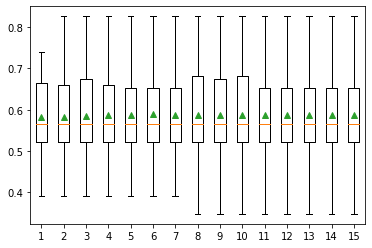

In [203]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
X = data_series[['BTC-USD DoD Chg', 'SPY DoD Chg', 'QQQ DoD Chg', "Elon Mentioned", 'Doge Sentiment']]
y = data_series['Doge Pos Chg']
# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

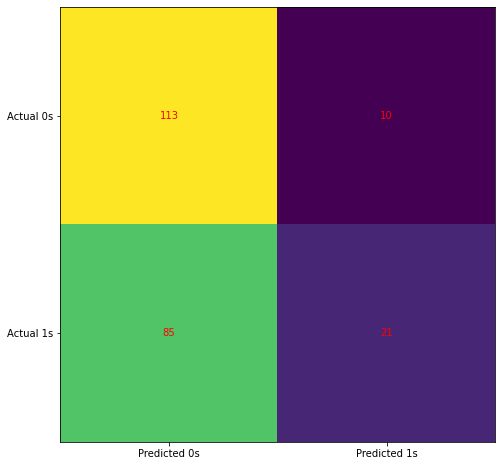

In [204]:
model.fit(X,y)
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

df = pd.DataFrame(model.predict(X))
df.to_excel('Predicted.xlsx')